# 第4章

In [1]:
import pandas as pd

In [40]:
%matplotlib inline

In [8]:
!ls data/DL76333/R/

ad_result.csv             section3-install.csv      section5-ab_test_imp.csv
sample-data               section4-dau.csv          section7-dau.csv
section3-dau.csv          section4-user_info.csv
section3-dpu.csv          section5-ab_test_goal.csv


In [9]:
# Daily Active User -> １日１回以上アクセスしたユーザーのデータ
dau = pd.read_csv('./data/DL76333/R/section4-dau.csv')

In [10]:
user_info = pd.read_csv('./data/DL76333/R/section4-user_info.csv')

In [11]:
dau.head()

,log_date,app_name,user_id
0,2013-08-01,game-01,33754
1,2013-08-01,game-01,28598
2,2013-08-01,game-01,30306
3,2013-08-01,game-01,117
4,2013-08-01,game-01,6605


In [12]:
user_info.head()

,install_date,app_name,user_id,gender,generation,device_type
0,2013-04-15,game-01,1,M,40,iOS
1,2013-04-15,game-01,2,M,10,Android
2,2013-04-15,game-01,3,F,40,iOS
3,2013-04-15,game-01,4,M,10,Android
4,2013-04-15,game-01,5,M,40,iOS


In [14]:
# dauにuser_infoをくっつける
dau_user_info = pd.merge(dau, user_info, how='inner', on=['user_id'])

In [15]:
dau_user_info.head()

,log_date,app_name_x,user_id,install_date,app_name_y,gender,generation,device_type
0,2013-08-01,game-01,33754,2013-08-01,game-01,M,20,iOS
1,2013-08-02,game-01,33754,2013-08-01,game-01,M,20,iOS
2,2013-08-01,game-01,28598,2013-07-16,game-01,M,50,iOS
3,2013-08-04,game-01,28598,2013-07-16,game-01,M,50,iOS
4,2013-08-12,game-01,28598,2013-07-16,game-01,M,50,iOS


## データ分析

1. セグメント分析をする（セグメント毎にクロス集計する）
2. 特定できたセグメントの可視化を行う

In [18]:
# 　アクセス月毎、年代による集計
dau_user_info['log_date'] = pd.to_datetime(dau_user_info['log_date'])
dau_user_info['log_date_ym'] = dau_user_info['log_date'].dt.strftime('%Y%m')

In [19]:
dau_user_info.head()

,log_date,app_name_x,user_id,install_date,app_name_y,gender,generation,device_type,log_date_ym
0,2013-08-01,game-01,33754,2013-08-01,game-01,M,20,iOS,201308
1,2013-08-02,game-01,33754,2013-08-01,game-01,M,20,iOS,201308
2,2013-08-01,game-01,28598,2013-07-16,game-01,M,50,iOS,201308
3,2013-08-04,game-01,28598,2013-07-16,game-01,M,50,iOS,201308
4,2013-08-12,game-01,28598,2013-07-16,game-01,M,50,iOS,201308


In [30]:
dau_user_info_cross_count = pd.pivot_table(dau_user_info, values='user_id', index='log_date_ym', columns='generation', aggfunc='count')

In [31]:
dau_user_info_cross_count.head()

generation,10,20,30,40,50
log_date_ym,,,,,
201308,18785,33671,28072,8828,4829
201309,15391,27229,22226,7494,3835


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


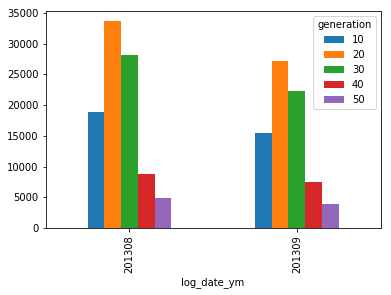

In [41]:
dau_user_info_cross_count.plot(kind='bar')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


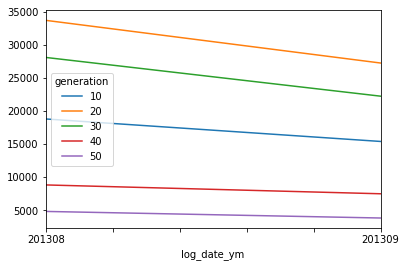

In [46]:
dau_user_info_cross_count.plot(kind='line')

In [34]:
# すげー。性別x年代がいけた
dau_user_info_gxg_count = pd.pivot_table(dau_user_info, values='user_id', index='log_date_ym', columns=['gender', 'generation'], aggfunc='count')

In [35]:
dau_user_info_gxg_count.head()

gender          F                               M                          
generation     10     20     30    40    50    10     20     30    40    50
log_date_ym                                                                
201308       9091  17181  14217  4597  2257  9694  16490  13855  4231  2572
201309       7316  13616  11458  3856  1781  8075  13613  10768  3638  2054

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


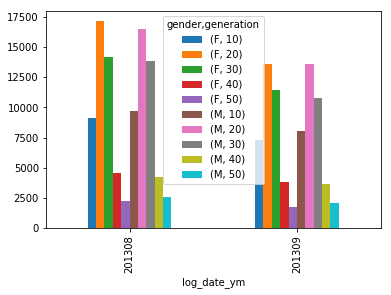

In [44]:
dau_user_info_gxg_count.plot(kind='bar')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


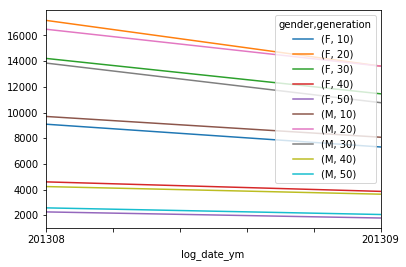

In [45]:
dau_user_info_gxg_count.plot(kind='line')

In [37]:
# デバイスごと
dau_user_info_cross_device = pd.pivot_table(dau_user_info, values='user_id', index='log_date_ym', columns='device_type', aggfunc='count')

In [38]:
dau_user_info_cross_device.head()

device_type,Android,iOS
log_date_ym,,
201308,46974,47211
201309,29647,46528


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


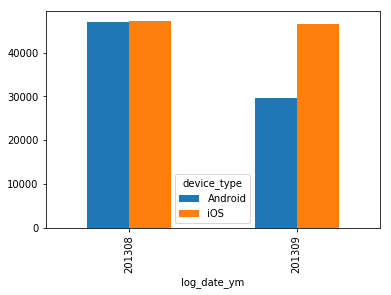

In [47]:
# 図にするとわかりやすい気がする
dau_user_info_cross_device.plot(kind='bar')

/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


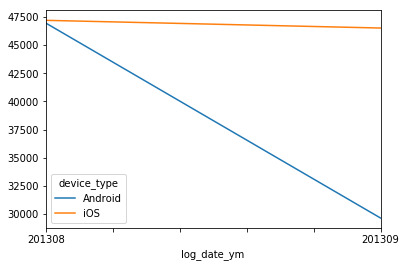

In [48]:
dau_user_info_cross_device.plot(kind='line')

In [55]:
by_log_date_device = pd.pivot_table(dau_user_info, values='user_id', index='log_date', columns='device_type', aggfunc='count')

In [56]:
by_log_date_device.head()

device_type,Android,iOS
log_date,,
2013-08-01,1784,1805
2013-08-02,1386,1451
2013-08-03,1295,1351
2013-08-04,1283,1314
2013-08-05,2002,2038


/Users/kazumatamaki/.pyenv/versions/anaconda3-2.3.0/lib/python3.4/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


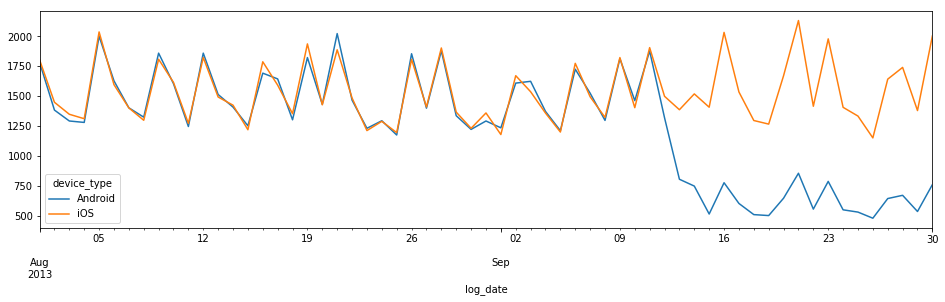

In [59]:
# すげー！わかりやすい！！
by_log_date_device.plot(y=['Android', 'iOS'], figsize=(16,4))